## Simple Text Classification
Sentiment analysis enables us to infer whether some text is positive or negative. Training a classifier could be useful to decide the level of success of a product.

In this exercise, you will work with movie reviews from the IMDB movie dataset. Each review is labeled as positive or negative.

Instructions:
Process each review with the function transform. It will remove special characters, punctuation signs and will transform everything to lower case.

Think of words that are present in positive reviews. Add them to the pos_key list. Do the same with words that represent negative reviews.

Count the occurrence of the positive words and negative words in both positive and negative reviews.

Score the reviews positive if they have more positive reviews. Do the analogous with the negative reviews.

Plot the histogram of the positive and negative scores for each class.

Hints
To count the number of occurrences of a word in a list use the method

list().count(substring)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle

For your convenience, the data is already stored in the file _reviews.pkl_ which you can read using the code below. 

In [6]:
with open('reviews.pkl', 'rb') as file:
    train, _ = pickle.load(file)
len(train)

4000

Each review is stored in a list. You can explore the contents of each review.

In [7]:
train[16]

"I don't know why some guys from US, Georgia or even from Bulgaria have the courage to express feelings about something they don't understand at all. For those who did not watch this movie - watch it. Don't expect too much or don't put some frameworks just because this is Kosturica. Watch the movie without prejudice, try to understand the whole humor inside - people of Serbia DID actually getting married while Bil Clinton bomb their villages, gypsies in all Balkans are ALWAYS try to f*ck you up in any way they can, LOVE is always unexpected, pure and colorful, and Balkans are extremely creative. For those who claims this is a bad movie I can see only that the American's sh*t (like Meet Dave, Get Smart etc) are much much worse than a pure, frank Balkan humoristic love story movie as Promise me. The comment should be useful and on second place should represent the personal view of the writer. I think the movie is great and people watch it must give their respects to the director and stor

### ⏸ How many characters does the longest review have?

#### A. 4000
#### B. 10363
#### C. 8754

In [8]:
max = 0
for x in train:
    if(len(x)>max):
        max= len(x)
        
print(max)

10363


In [9]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'B'

The dataset is organized such as the first 2000 reviews are positive, and the rest negative.

In [10]:
train_pos = train[:2000]
train_neg = train[2000:]

Each review is in natural language, which means that it contains punctuation signs and uppercase letters. Because of the nature of the data, each review has HTML characters. 

In order to analyze the information, you have to remove all the special characters and replace upper case words with lower case. Use the following function to do so.

In [11]:
def transform(review):
    # Lower case
    review = review.lower()
    
    # Remove HTML
    review = re.sub('<br /><br />', ' ', review)
    
    # Replace all none alphanumeric characters with spaces
    review = re.sub(r'[^a-zA-Z0\s]', '', review)
    
    return review

In [12]:
# Use the function above to transform your data
train_pos = list(map(transform, train_pos))
train_neg = list(map(transform, train_neg))


In [13]:
train_pos[1]

'i watched this film without knowing anything about it whatsoever and found it similar thematically to billy elliott 000 both films are based around a troubled fatherson relationship in both films the son does not want to follow his father down the mines and dreams of a better life away from their home town both sons face derision by their classmates and both have a strong female role model who teaches them the major difference that i found between the films was that october sky was an infinitely more interesting and touching film laura dern puts in a moving performance and chris cooper plays the disapproving father very well as he went on to do in american beauty  joe johnston surprised me with his subtle directing very different from his other directorial features such as jumanji  and jurassic park iii 00 '

In this exercise, you will look for keywords that you think represent a good movie and keywords that represent bad movies. 

We expect that a _positive_ review will have more possitive than negative words. 

To test the hypotesis, count the number of positive and negative words in each review of the training set, for each category. 


In [33]:
# Your code here
#pos_key = ['good']
pos_key = ['good', 'surprised', 'best','interesting']
neg_key = ['bad', 'boring', 'worst','waste']

In [34]:
# This counts the words for the positive reviews

# Create numpy array to store the scores
scores_pos = np.zeros((len(train_pos), 2))

# For each word in pos_key
for j in range(len(pos_key)):
    # For each review
    for i in range(scores_pos.shape[0]):
        # Add the number of times the word is found
        scores_pos[i,0]+=train_pos[i].count(pos_key[j])

# For each word in neg_key
for j in range(len(neg_key)):
    # For each review
    for i in range(scores_pos.shape[0]):
        # Add the number of times the word is found
        scores_pos[i,1]+=train_pos[i].count(neg_key[j])        
        

Compute the scores for the negative reviews.

In [40]:
# This counts the words for the positive reviews

# Create numpy array to store the scores
scores_neg = np.zeros((len(train_neg), 2))

# For each word in pos_key
for j in range(len(pos_key)):
    # For each review
    for i in range(scores_neg.shape[0]):
        # Add the number of times the word is found
        scores_neg[i,0]+=train_neg[i].count(pos_key[j])

# For each word in neg_key
for j in range(len(neg_key)):
    # For each review
    for i in range(scores_neg.shape[0]):
        # Add the number of times the word is found
        scores_neg[i,1]+=train_neg[i].count(neg_key[j])  

In [32]:
# Your code here
sum = 0;
for i in range(len(scores_pos)):
    sum =sum+scores_pos[i][0]
average = sum/len(scores_pos)
print(average)

0.6705


### ⏸ What is the average number of appearances of the word **good** in the positive reviews?

#### A. 0.30
#### B. 0.45
#### C. 0.67

In [26]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'C'

In order to compare the success of your strategy, you must define a criteria. 

The simplest one to check if a review is good is to look if the number of positive words occurs more than negative words. For a negative review, the number of negative words should be higher than the positive ones.

How many good reviews are classified correctly according to this score? How many negative ones are classified correctly?

Remember that you are working with 2000 examples of each category.

In [38]:
# Your code here
count = 0
for i in range(len(scores_pos)):
    if(scores_pos[i][0]>scores_pos[i][1]):
        count+=1
print(count)

1111


Create histograms to analyze the score distribution for the possitive reviews.

Do the results coincide with your expectations?

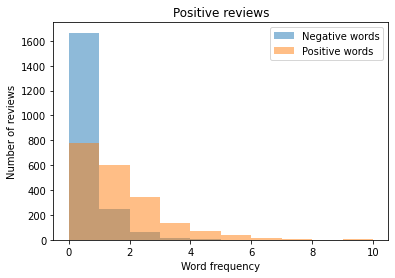

In [39]:
# Assuming that the first column of scores_pos contains the positive score
#and the second the negative score.
plt.hist(scores_pos[:,1], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='Negative words')
plt.hist(scores_pos[:,0], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='Positive words')
plt.legend(loc=0)
plt.title('Positive reviews')
plt.xlabel('Word frequency')
plt.ylabel('Number of reviews')
plt.show()


Generate the same histograms for the negative reviews.

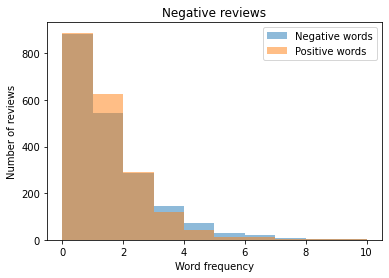

In [41]:
# Your code here
# Assuming that the first column of scores_pos contains the positive score
#and the second the negative score.
plt.hist(scores_neg[:,1], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='Negative words')
plt.hist(scores_neg[:,0], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='Positive words')
plt.legend(loc=0)
plt.title('Negative reviews')
plt.xlabel('Word frequency')
plt.ylabel('Number of reviews')
plt.show()

In general, the presence of _bad_ words do not represent a bad movie. For example in the following review, we can see many _bad_ words that in the context are used to describe something positive.

In [42]:
train[17]

"Or at least one of the best. I think this is a very fun and very cool game for the N64. Bowser is up to his usual shenanigans (yeah it's a dumb word but the only one I can think of) and Mario must stop him again. This game is very fun to play, and contains lots of nostalgia to me. The only bad thing about it is the graphics, which are awful to today's standards, but everything else is pretty good (especially the little mini-games you can unlock) It's the second best N64 game (the first best is Conker's Bad Fur Day) that I recommend to any Mario fan, or any fan of platform games. It beats out mediocre Super Mario Sunshine any day.<br /><br />9/10 or: A"

You can see that the words _bad_, _awful_ and _mediocre_ are in the review. But they are used to compare it to another title. 

Moreover, if you look closely, you will see that this is not a movie, but a game, which might have different keywords that describe its behavior.

### ⏸ In your own words, how important is the context here?

Sentence is not only created using words its a flow of emotion. So to judge any sentance we need to know the context or emotion behind it. Contextual analysis helps us to tell a clear, nuanced story of why people feel the way they do.
